In [1]:
import pandas as pd
import numpy as np 
import sys 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from constants import DATA_PATH

In [3]:
# read the data
books = pd.read_csv(f"{DATA_PATH}Books.csv")
users = pd.read_csv(f"{DATA_PATH}Users.csv")
rank = pd.read_csv(f"{DATA_PATH}Ratings.csv")

/var/folders/rm/52snk1ts6lv7smxnr467kzbx2hmb6p/T/ipykernel_20121/339177162.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(f"{DATA_PATH}Books.csv")


# Books

In [4]:
# Let's drop 3 last columns 
books.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], inplace=True)
print(f"Total df shape is {books.shape}")

Total df shape is (271360, 5)


In [5]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [6]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
count,271360,271360,271358,271360,271358
unique,271360,242135,102022,202,16807
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin
freq,1,27,632,13903,7535


In [7]:
# Almost all values are filled
books.isna().sum(axis=0)

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
dtype: int64

In [8]:
# Correctionf from  https://www.kaggle.com/code/arashnic/recom-i-data-understanding-and-simple-recomm/notebook
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher']
books.loc[books.ISBN == '0789466953','yearOfPublication'] = 2000
books.loc[books.ISBN == '0789466953','bookAuthor'] = "James Buckley"
books.loc[books.ISBN == '0789466953','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','bookTitle'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

books.loc[books.ISBN == '078946697X','yearOfPublication'] = 2000
books.loc[books.ISBN == '078946697X','bookAuthor'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','bookTitle'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

books.loc[books.ISBN == '2070426769','yearOfPublication'] = 2003
books.loc[books.ISBN == '2070426769','bookAuthor'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','bookTitle'] = "Peuple du ciel, suivi de 'Les Bergers"

books.loc[(books.ISBN == '193169656X'),'publisher'] = 'other'
books.loc[(books.ISBN == '1931696993'),'publisher'] = 'other'

books.yearOfPublication=pd.to_numeric(books.yearOfPublication, errors='coerce')

books.loc[(books.yearOfPublication > 2006) | (books.yearOfPublication == 0),'yearOfPublication'] = np.NAN
books.yearOfPublication.fillna(round(books.yearOfPublication.mean()), inplace=True)
books.yearOfPublication = books.yearOfPublication.astype(np.int32)


books.loc[(books.ISBN == '2070426769') | (books.ISBN == '0789466953') | (books.ISBN == '078946697X'), :]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc


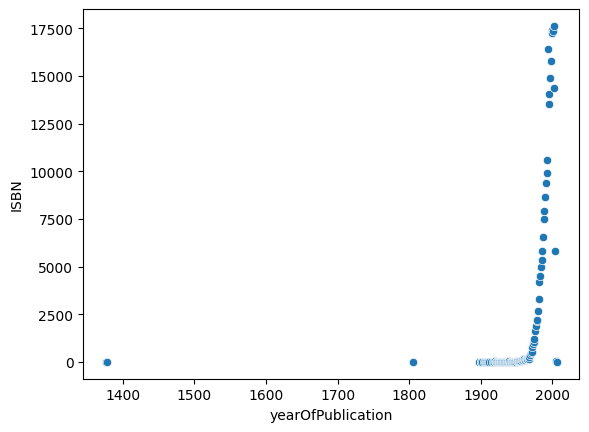

In [9]:
#Distribution of the publication year
grouped_by_year = books.groupby("yearOfPublication").count()["ISBN"].reset_index()
sns.scatterplot(grouped_by_year, x="yearOfPublication", y="ISBN");

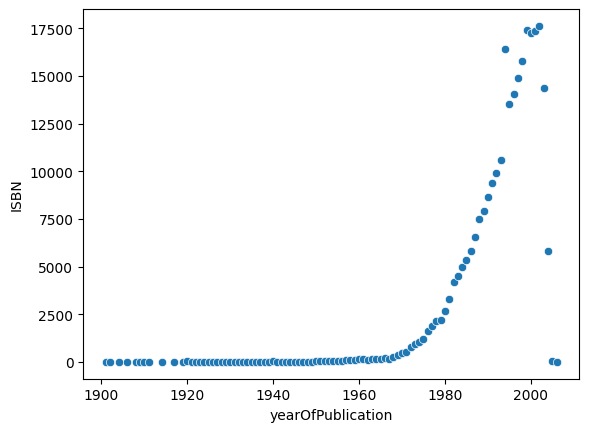

In [10]:
# Zoomed a bit
sns.scatterplot(grouped_by_year[grouped_by_year["yearOfPublication"] > 1900], x="yearOfPublication", y="ISBN");

In [11]:
# Top 10 published authors
books.groupby("bookAuthor")["ISBN"].count().reset_index().sort_values("ISBN").tail(10)

,bookAuthor,ISBN
14420,Charles Dickens,302
7309,Barbara Cartland,307
73340,Nora Roberts,315
39998,Isaac Asimov,330
30557,Francine Pascal,372
13495,Carolyn Keene,373
4565,Ann M. Martin,423
91186,Stephen King,524
100921,William Shakespeare,567
1086,Agatha Christie,632


# Users

In [12]:
print(f"Total df shape is {users.shape}")

Total df shape is (278858, 3)


In [13]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [14]:
# Btw it would be also nice to check location column.
# For example, Moscow, Yukon Territory, Russia does not make any sense. 

<Axes: xlabel='Age'>

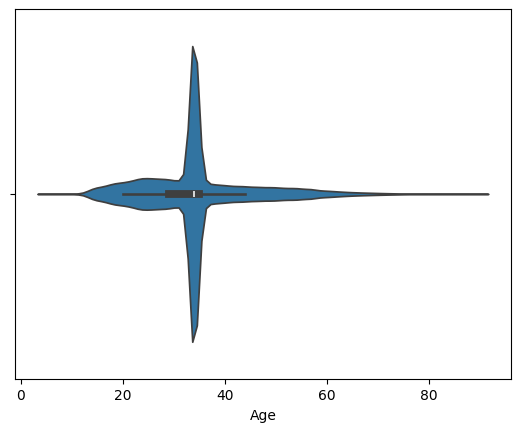

In [15]:
# I prefer violin plots.
users.loc[(users.Age > 90) | (users.Age < 5), 'Age'] = np.nan
users.Age = users.Age.fillna(users.Age.mean())
users.Age = users.Age.astype(np.int16)

sns.violinplot(x=users.Age)

In [16]:
# Locations are not correct at least for 1.5% of people  
users[users['Location'].map(lambda x: len(x.split(', '))) < 3]

,User-ID,Location,Age
18,19,"weston, ,",14
90,91,"toronto/newmarket, ,",34
311,312,"lk, jlk,",34
317,318,"berlin, n/a,",34
536,537,"davis, california,",34
...,...,...,...
278624,278625,"savona, ,",36
278651,278652,"murrieta, ,",34
278697,278698,"pasadena, maryland,",34
278716,278717,"mayagüez, puerto rico,",53


# Ranking DF

In [17]:
print(f"Total df shape is {rank.shape}")
rank.head()

Total df shape is (1149780, 3)


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [18]:
print(f"Total users num {len(users['User-ID'].unique())}")
print(f"Total books num {len(books['ISBN'].unique())}")

Total users num 278858
Total books num 271360


In [19]:
# Let's Filter Books and Users
rank = rank[rank["ISBN"].isin(set(books['ISBN'].unique()))]
rank = rank[rank["User-ID"].isin(set(users['User-ID'].unique()))]
rank.shape

(1031136, 3)

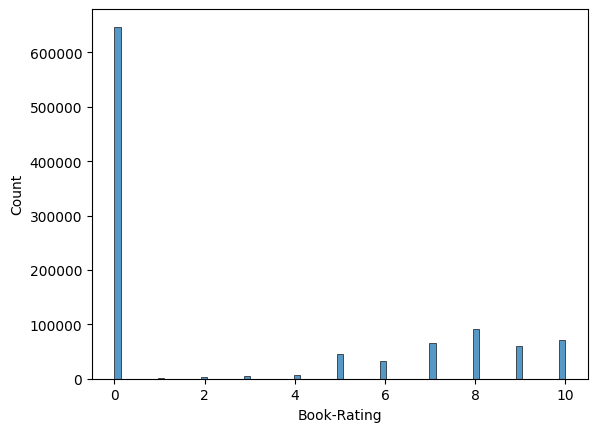

In [20]:
sns.histplot(rank['Book-Rating']);

In [21]:
# Let's top-10 most pop book just for fun.
# We innetnionally use here sum instead of mean
top_rank_books = rank.groupby("ISBN")["Book-Rating"].sum().sort_values().iloc[-10:]
pd.merge(top_rank_books, books, on="ISBN")

,ISBN,Book-Rating,bookTitle,bookAuthor,yearOfPublication,publisher
0,0671027360,2179,Angels &amp; Demons,Dan Brown,2001,Pocket Star
1,0452282152,2219,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books
2,0446672211,2402,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books
3,0060928336,2524,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
4,0971880107,2551,Wild Animus,Rich Shapero,2004,Too Far
5,0142001740,2595,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
6,059035342X,2798,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books
7,0312195516,3134,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
8,0385504209,4108,The Da Vinci Code,Dan Brown,2003,Doubleday
9,0316666343,5787,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"


In [22]:
books

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [23]:
# Let's top-10 most pop authors just for fun.
# We innetnionally use here sum instead of mean
rank = pd.merge(rank, books[["ISBN", "bookAuthor"]], on="ISBN")
top_rank_books = rank.groupby("bookAuthor")["Book-Rating"].sum().sort_values().iloc[-10:]
top_rank_books

bookAuthor
Anne Rice              9198
Sue Grafton            9537
Dean R. Koontz        11169
Janet Evanovich       11838
Mary Higgins Clark    12583
J. K. Rowling         15662
James Patterson       18375
John Grisham          19184
Nora Roberts          22416
Stephen King          36254
Name: Book-Rating, dtype: int64

# That's all ! 